In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
with open('../results/times.txt') as f:
    times = f.readlines()

In [92]:
times = [float(time.strip()) for time in times]
times

[7.000207901000977,
 10.002374649047852,
 8.006095886230469,
 11.993646621704102,
 11.001825332641602,
 15.998363494873047]

Para calcular o intervalo de confiança, necessitamos realizar um grande número de amostras aleatórias da população original de tempos para cada operação (neste caso, 10.000), após isso, realiza-se o cálculo dos limites inferior e superior, por meio do cálculo dos números no percentil 2.5% e 97.5%, para obtermos 95% de confiança.

In [85]:
sample_means = []

for _ in range(10000):
    bootstrap = np.random.choice(means, 6, replace=True)
    sample_means.append(bootstrap.mean())
    
np.mean(sample_means)

10.673754783471425

In [86]:
np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)

(8.502801259358725, 13.000806172688803)

Agora podemos dizer, com 95% de confiança, que o tempo de execução médio das 6 operações encontra-se no intervalo [8.5, 13.16].

In [87]:
x_axis = ['Adicionar exp. em perfil', 'Listar info. pelo e-mail', 'Listar exp. pelo email', 
          'Listar perfis por faculdade', 'Listar exp. por cidade', 'Listar todos os perfis']

times_dict = dict(zip(x_axis, means))
times_sorted = dict(sorted(values.items(), key=lambda item: item[1]))
times_sorted

{'Adicionar exp. em perfil': 7.000207901000977,
 'Listar exp. pelo email': 8.006095886230469,
 'Listar info. pelo e-mail': 10.002374649047852,
 'Listar exp. por cidade': 11.001825332641602,
 'Listar perfis por faculdade': 11.993646621704102,
 'Listar todos os perfis': 15.998363494873047}

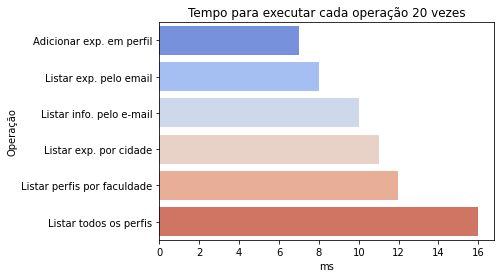

<Figure size 3600x3098.64 with 0 Axes>

In [89]:
sns.barplot(x=list(times_sorted.values()), y=list(times_sorted.keys()), palette='coolwarm')
plt.title('Tempo para executar cada operação 20 vezes')
plt.xlabel('ms')
plt.ylabel('Operação')
plt.figure(figsize=(50, 50/1.1618));